# PACKAGES USED 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
import pydotplus
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from sklearn.mixture import GaussianMixture

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# CLUSTERING

# HIERARCHIAL CLUSTERING ( MANHATTAN DISTANCE )

Due to high volume of data(1.4 L rows) google colab and my laptop could not process it. So I did with 10 CSV files.

In [ ]:
c1=[]
for i in range(1,10):
  s='/content/{}.csv'.format(i)
  data = pd.read_csv(s, index_col=None, header=0)
  l=[]
  for j in range(len(data)):
    l.append(i)
  data['person']=l
  c1.append(data)
frame = pd.concat(c1, axis=0, ignore_index=True)
frame

,step,x,y,z,person
0,0.000000,0.69464,3.17350,7.5048,1
1,0.030639,0.14982,3.48680,9.2755,1
2,0.069763,-0.29965,1.94770,9.1120,1
3,0.099823,-1.68890,1.41650,10.1200,1
4,0.129820,-2.17930,0.95342,10.9240,1
...,...,...,...,...,...
38310,256.000000,-0.76274,5.78860,8.3493,9
38311,256.030000,-0.69464,6.23810,7.0145,9
38312,256.060000,-0.69464,5.82950,6.7421,9
38313,256.090000,-0.57205,5.47540,7.8589,9


In [ ]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38315 entries, 0 to 38314
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   step    38315 non-null  float64
 1   x       38315 non-null  float64
 2   y       38315 non-null  float64
 3   z       38315 non-null  float64
 4   person  38315 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1.5 MB


In [ ]:
frame.to_csv('/content/processed.csv')

In [ ]:
X=np.array(frame.iloc[:,0:len(frame.columns)-1])
Y=np.array(frame.iloc[:,len(frame.columns)-1])

In [ ]:
av = AgglomerativeClustering(n_clusters=9,linkage = "average",affinity='manhattan')
t=av.fit(X)
val=av.fit_predict(X)
val

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
ac = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage = "average",affinity='manhattan')
ac.fit(X)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0,
                        linkage='average', memory=None, n_clusters=None)

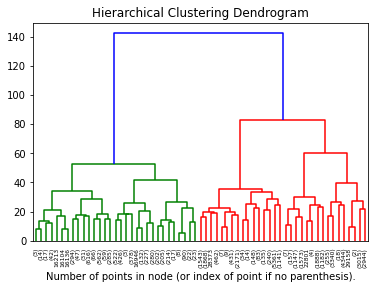

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(ac, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

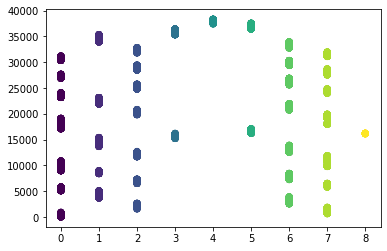

In [ ]:
l=range(len(val))
plt.scatter(val,l,c=val)

In [ ]:
print("Hierarchial: ",metrics.adjusted_rand_score(Y,val))

Hierarchial:  0.022785402152666497


# PROBABILITY BASED CLUSTERING (GAUSSIAN MIXTURE MODEL)

In [ ]:
model = GaussianMixture(n_components=9)

In [ ]:
model.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=9, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
val = model.predict(X)
val

array([0, 0, 0, ..., 1, 1, 1])

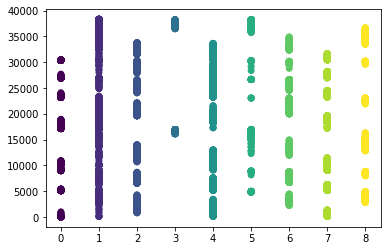

In [ ]:
l=range(len(val))
plt.scatter(val,l,c=val)

In [ ]:
print("Gaussian: ",metrics.adjusted_rand_score(Y,val))

Hierarchial:  0.05318704175140253
